In [1]:
%run '../../dataset-fcpc/pagamento pessoa fisica/read_dataset.py'
%run '../configura_display.py'

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Pagamentos a pessoas físicas da FCPC

Base de dados de pagamentos a pessoas físicas da Fundação Cearense de Pesquisa e Cultura.

O dataset a ser utilizado é a consolidação dos dados disponibilizados no [site da FCPC](http://www.fcpc.ufc.br/AcessoInformacao/PagamentoPessoaFisica).

* **Colunas**
  * **CPF**: mascarado
  * **NOME**
  * **TIPO DE PAGAMENTO**
  * **PROJETO**
  * **DATA**
  * **VALOR \(R$\)**
  
obs: os dados de 2017 são os disponíveis até o momento da coleta

In [18]:
fcpc = read_fcpc()
# registros com PROJETO null recebem valor ''
fcpc['PROJETO'] = fcpc.PROJETO.fillna('')
# renomeia colunas
fcpc.rename(columns={'TIPO DE PAGAMENTO': 'tipo',
                     'DATA': 'data',
                     'VALOR (R$)': 'valor',
                     'CPF': 'cpf',
                     'PROJETO': 'projeto',
                     'NOME': 'nome'}, inplace=True)

In [19]:
# estrutura de tabela
# índices à esquerda, gerados automaticamente
fcpc.head()

,data,valor,cpf,nome,tipo,projeto
0,2016-10-18,"2.200,00",***.000.473-**,NILTON CESAR VIEIRA SILVA,DIÁRIAS,2776 - TERMO DE COOP.PETROBRAS/UFC/FCPC PROJET...
1,2016-08-22,"2.200,00",***.000.473-**,NILTON CESAR VIEIRA SILVA,DIÁRIAS,2776 - TERMO DE COOP.PETROBRAS/UFC/FCPC PROJET...
2,2016-06-17,"2.640,00",***.000.473-**,NILTON CESAR VIEIRA SILVA,DIÁRIAS,2776 - TERMO DE COOP.PETROBRAS/UFC/FCPC PROJET...
3,2016-10-18,"2.200,00",***.031.193-**,SERGIO BEZERRA LIMA JUNIOR,DIÁRIAS,2776 - TERMO DE COOP.PETROBRAS/UFC/FCPC PROJET...
4,2016-07-12,"1.980,00",***.031.193-**,SERGIO BEZERRA LIMA JUNIOR,DIÁRIAS,2776 - TERMO DE COOP.PETROBRAS/UFC/FCPC PROJET...


In [20]:
fcpc.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202597 entries, 0 to 202596
Data columns (total 6 columns):
data       202597 non-null datetime64[ns]
valor      202597 non-null float64
cpf        202597 non-null object
nome       202597 non-null object
tipo       202597 non-null object
projeto    202597 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 74.0 MB


# Análise univariada

## data

In [100]:
fcpc.data.describe()

count                  202597
unique                   3856
top       2002-12-20 00:00:00
freq                     1191
first     2002-01-02 00:00:00
last      2017-10-30 00:00:00
Name: data, dtype: object

In [21]:
fcpc['ano'] = fcpc.data.dt.year.astype('category')
fcpc['mes'] = fcpc.data.dt.month.astype('category')

In [22]:
fcpc[['ano', 'mes']].describe()

,ano,mes
count,202.597,202.597
unique,16,12
top,2.014,12
freq,22.143,23.451


In [23]:
# quantidade por ano
fcpc.ano.value_counts(sort=False)

2.002    6.468
2.003    6.645
2.004    7.948
2.005   10.989
2.006   13.573
2.007    9.431
2.008    5.432
2.009    7.736
2.010   20.198
2.011   17.742
2.012   17.210
2.013   17.922
2.014   22.143
2.015   17.813
2.016   11.650
2.017    9.697
Name: ano, dtype: int64

In [24]:
# quais os 10 meses com maior quantidade
fcpc.groupby(['ano', 'mes']).size().nlargest(10)

ano    mes
2.015  12    2.961
2.014  7     2.517
       5     2.349
       8     2.341
       3     2.187
2.006  12    2.181
2.013  10    2.051
2.012  5     2.036
       3     2.018
2.014  9     2.017
dtype: int64

## valor

In [25]:
fcpc.valor.describe()

count   202.597,00
mean      1.565,33
std       3.018,57
min           0,00
25%         177,00
50%         560,00
75%       2.000,00
max     328.428,65
Name: valor, dtype: float64

In [26]:
# valor < 1,00?
fcpc_valor_0 = fcpc[fcpc.valor < 1.]
fcpc_valor_0.head()

,data,valor,cpf,nome,tipo,projeto,ano,mes
272,2015-11-11,"0,00",***.400.053-**,RAIMUNDO MARIANO GOMES C. BRANCO,ADIANTAMENTO PARA DESPESAS,2776 - TERMO DE COOP.PETROBRAS/UFC/FCPC PROJET...,2.015,11
1.073,2014-12-08,"0,00",***.001.203-**,HAMILTON TEIXEIRA DOS SANTOS JUNIOR,ADIANTAMENTO PARA VIAGENS,2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DO...,2.014,12
1.074,2014-09-22,"0,00",***.001.203-**,HAMILTON TEIXEIRA DOS SANTOS JUNIOR,ADIANTAMENTO PARA VIAGENS,2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DO...,2.014,9
1.118,2015-09-15,"0,00",***.014.793-**,ELISIANY LEITE LOPES DE SOUZA,ADIANTAMENTO PARA VIAGENS,2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DO...,2.015,9
1.121,2015-04-29,"0,00",***.014.793-**,ELISIANY LEITE LOPES DE SOUZA,ADIANTAMENTO PARA VIAGENS,2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DO...,2.015,4


In [27]:
fcpc[fcpc.valor < 1].valor.value_counts()

0,00   2.626
0,61       1
0,50       1
Name: valor, dtype: int64

In [28]:
fcpc[fcpc.valor == 0.61]

,data,valor,cpf,nome,tipo,projeto,ano,mes
123.694,2010-08-06,"0,61",***.297.653-**,KATIANNE BATISTA DE SOUSA,ADIANTAMENTO PARA DESPESAS,2233 - CV - CEFET/FCPC - CURSOS DE LIC. MATEMA...,2.010,8


In [29]:
fcpc[fcpc.valor == 0.5]

,data,valor,cpf,nome,tipo,projeto,ano,mes
2.219,2015-04-23,"0,50",***.531.993-**,FRANCISCO CLEUTON DE ARAUJO,ADIANTAMENTO PARA VIAGENS,2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DO...,2.015,4


In [30]:
# 5 maiores valores
fcpc.nlargest(5, 'valor')

,data,valor,cpf,nome,tipo,projeto,ano,mes
32.388,2016-12-19,"328.428,65",***.839.713-**,FRANCISCO EDUARDO ARAUJO SOARES,SERVIÇO PRESTADO - RPA,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,2.016,12
32.267,2016-12-19,"212.758,81",***.468.963-**,FRANCISCO SULIANO MESQUITA DE PAULA,SERVIÇO PRESTADO - RPA,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,2.016,12
32.419,2016-12-19,"212.391,25",***.966.093-**,FAUSTO NILO COSTA JUNIOR,SERVIÇO PRESTADO - RPA,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,2.016,12
32.103,2016-12-19,"182.058,44",***.140.963-**,FRANCISCO QUEIROZ D. NETO,SERVIÇO PRESTADO - RPA,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,2.016,12
32.396,2015-02-26,"154.874,13",***.839.713-**,FRANCISCO EDUARDO ARAUJO SOARES,SERVIÇO PRESTADO - RPA,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,2.015,2


In [31]:
# 5 pessoas com maiores somas de valores
fcpc.groupby('nome').valor.sum().nlargest(5)

nome
ADRIANO CESAR PRADO CYSNE            1.313.669,28
FRANCISCO RODRIGO PORTO CAVALCANTI   1.180.388,69
DAMIAO CARNEIRO DE ALMEIDA           1.112.585,80
MARCELO ARAUJO LIMA                  1.049.617,73
LEONILDO ADAO CHRISTOFOLETTI         1.032.118,17
Name: valor, dtype: float64

In [32]:
# informações de valores por ano
fcpc.groupby('ano').valor.describe()

,count,mean,std,min,25%,50%,75%,max
ano,,,,,,,,
2.002,"6.468,00","1.366,36","1.579,57","1,00","375,00","825,60","1.727,78","28.400,00"
2.003,"6.645,00","1.415,82","1.720,99","1,00","358,50","800,00","1.741,37","22.584,00"
2.004,"7.948,00","1.268,59","1.688,77","1,00","350,00","724,00","1.500,00","37.406,00"
2.005,"10.989,00","1.085,36","1.710,51","1,00","260,00","500,00","1.200,00","45.000,00"
2.006,"13.573,00","1.238,81","1.731,44","1,00","300,00","672,86","1.500,00","37.100,00"
2.007,"9.431,00","1.430,70","1.827,66","1,00","350,00","805,31","1.832,50","50.500,00"
2.008,"5.432,00","1.662,17","2.124,22","1,00","500,00","1.000,00","2.048,76","50.500,00"
2.009,"7.736,00","1.685,54","2.605,99","1,00","300,00","880,00","2.319,28","72.705,60"
2.010,"20.198,00","1.388,27","2.652,92","0,00","177,00","442,50","1.500,00","53.976,73"


In [33]:
# soma por ano
fcpc.groupby('ano').valor.sum()

ano
2.002    8.837.595,78
2.003    9.408.110,81
2.004   10.082.756,28
2.005   11.926.991,68
2.006   16.814.320,76
2.007   13.492.904,83
2.008    9.028.904,84
2.009   13.039.335,26
2.010   28.040.374,75
2.011   24.811.577,93
2.012   23.927.205,13
2.013   27.713.212,87
2.014   35.353.048,72
2.015   37.195.475,07
2.016   30.589.704,69
2.017   16.869.591,32
Name: valor, dtype: float64

## cpf

In [101]:
fcpc.cpf.describe()

count             202597
unique             22633
top       ***.337.663-**
freq                 445
Name: cpf, dtype: object

In [34]:
# há um NOME associado a mais de um CPF mascarado?
cpf_por_nome = fcpc.groupby('nome').cpf.unique()
mais_de_um = cpf_por_nome.apply(len).where(lambda x: x > 1).dropna()
cpf_por_nome[mais_de_um.index]

nome
ALDENIRA ALVES DOS SANTOS                               [***.485.753-**, ***.910.603-**]
ANA CRISTINA DE OLIVEIRA                                [***.167.054-**, ***.810.673-**]
ANA LUCIA DA SILVA                                      [***.191.063-**, ***.551.443-**]
ANA MARIA DA SILVA                                      [***.458.944-**, ***.744.063-**]
ANA MARIA DOS SANTOS                                    [***.102.906-**, ***.645.453-**]
ANA PAULA DA SILVA                                      [***.710.363-**, ***.921.293-**]
ANA PAULA DOS SANTOS                                    [***.347.423-**, ***.885.323-**]
ANTONIA IEDA DE SOUZA PRADO                             [***.364.803-**, ***.111.111-**]
ANTONIA MARSILVIA ALMEIDA DOS SANTOS                    [***.502.183-**, ***.708.693-**]
ANTONIO ALVES DOS SANTOS                                [***.465.303-**, ***.203.283-**]
ANTONIO CARLOS DA SILVA BARROS                          [***.211.843-**, ***.222.893-**]
CARLOS ALBERTO C

## tipo

In [102]:
fcpc.tipo.describe()

count                        202597
unique                           32
top       ADIANTAMENTO PARA VIAGENS
freq                          43521
Name: tipo, dtype: object

In [35]:
fcpc.tipo.value_counts()

ADIANTAMENTO PARA VIAGENS                                               43.521
SERVIÇO PRESTADO - RPA                                                  32.452
FOLHA DE PAGAMENTO - CLT                                                25.410
RPA                                                                     25.296
LIQUIDO DA FOLHA                                                        22.228
ADIANTAMENTO PARA DESPESAS                                              19.104
BOLSA                                                                   17.281
ADIANTAMENTO PARA VIAGEM                                                 7.457
RPA [P.FÍSICA]                                                           3.238
DIÁRIAS [PAGTO]                                                          1.891
DIÁRIAS                                                                  1.765
BOLSA DE ESTUDO E PESQUISA                                               1.389
RESSARCIMENTO DE DESPESA                            

In [138]:
fcpc[fcpc.tipo == 'FOLHA DE PAGAMENTO - CLT'].groupby('nome').valor.describe().nlargest(10, '50%')

,count,mean,std,min,25%,50%,75%,max
nome,,,,,,,,
ROSELIA COSTA DE CASTRO MACHADO,"7,00","9.622,02","1.852,04","7.750,00","7.750,00","10.333,33","10.750,00","12.270,83"
ADALBERTO DE SOUZA DOMINGUES,"2,00","10.083,16","4.203,98","7.110,50","8.596,83","10.083,16","11.569,49","13.055,82"
MARCOS AURELIO F. VASCONCELOS,"15,00","10.516,51","3.668,62","3.841,94","9.293,39","9.925,00","14.825,00","14.825,00"
DANYEL BRITO PEROTE DE OLIVEIRA SENA,"18,00","8.985,72","3.784,47","3.516,13","8.352,23","9.000,00","9.000,00","21.690,71"
ROBSON NEGREIROS BEZERRA,"2,00","8.874,11","4.043,40","6.015,00","7.444,56","8.874,11","10.303,67","11.733,23"
ANTONIA DIANA BRAGA NOGUEIRA,"2,00","8.315,90","6.266,24","3.885,00","6.100,45","8.315,90","10.531,35","12.746,80"
VINICIUS MOURA ROMAO,"2,00","8.281,64","6.913,11","3.393,33","5.837,49","8.281,64","10.725,80","13.169,95"
DANYEL BRITO PEROTE DE OLIVEIRA,"15,00","8.381,17","3.234,88","2.433,24","7.430,84","8.000,00","8.000,00","17.905,93"
SAURATER FARADAY FLORENTINO DE ALMEIDA,"9,00","8.231,18","2.795,72","3.956,47","6.700,00","8.000,00","8.375,00","13.265,78"


In [48]:
# consolidando alguns tipos
tipos_consolidados = {'ADIANT. À P. FÍSICA DESP. VINCULADAS À FCPC - PROJETOS': 'adiantamento',
 'ADIANT. À PESSOA FÍSICA REF. DESP. RELACIONADAS À EXECUÇÃO DO PROJETO': 'adiantamento',
 'ADIANTAMENTO DE VIAGEM': 'adiantamento',
 'ADIANTAMENTO PARA DESPESAS': 'adiantamento',
 'ADIANTAMENTO PARA VIAGEM': 'adiantamento',
 'ADIANTAMENTO PARA VIAGENS': 'adiantamento',
 'ADIANTAMENTOS': 'adiantamento',
 'ADIANTAMENTOS PARA COMBUSTIVEL': 'adiantamento',
 'BOLSA': 'bolsa',
 'BOLSA DE ESTUDO E PESQUISA': 'bolsa',
 'DIARIAS': 'diária',
 'DIÁRIAS': 'diária',
 'DIÁRIAS [COMPLEMENTO]': 'diária',
 'DIÁRIAS [PAGTO]': 'diária',
 'EVENTOS [CURSOS, CONGRESSOS, FEIRAS E SEMINÁRIOS] [RESSARCIMENTO]': 'evento',
 'FOLHA DE PAGAMENTO - CLT': 'folha',
 'LIQUIDO 13º SALARIO': '13º',
 'LIQUIDO DA FOLHA': 'folha',
 'LÍQUIDO DA RESCISÃO': 'rescisão',
 'LÍQUIDO DE FÉRIAS': 'férias',
 'RPA': 'rpa',
 'RPA [P.FÍSICA]': 'rpa',
 'SERVIÇO PRESTADO - RPA': 'rpa'
}

fcpc['tipo_consolidado'] = fcpc.tipo.apply(lambda v: tipos_consolidados.get(v, v))

In [50]:
fcpc.tipo_consolidado.value_counts()

adiantamento                                  70.611
rpa                                           60.986
folha                                         47.638
bolsa                                         18.670
diária                                         3.700
RESSARCIMENTO DE DESPESA                         556
férias                                           129
13º                                              127
rescisão                                          59
VALOR REF. A GRFC                                 50
DESPESAS DIVERSAS [RESSARCIMENTO]                 21
SUPRIMENTOS DE CAIXA FCPC                         20
PENSAO ALIMENTICIA                                12
14º SALÁRIO - FCPC - FUNDO DE CRÉDITO              7
evento                                             7
DEVOLUÇÃO                                          2
PAGTO COMPLEMENTAR RPA DIF  BRUTO X LIQUIDO        1
SERV PRESTADO PESS FISICA NF AVULSA                1
Name: tipo_consolidado, dtype: int64

In [59]:
tipos_estranhos = ['SERV PRESTADO PESS FISICA NF AVULSA', 'DEVOLUÇÃO', '14º SALÁRIO - FCPC - FUNDO DE CRÉDITO',
                   'PENSAO ALIMENTICIA']
fcpc[fcpc.tipo.isin(tipos_estranhos)]

,data,valor,cpf,nome,tipo,projeto,ano,mes,tipo_consolidado
23.525,2017-10-17,"468,50",***.205.673-**,KATIA VALERIA CRISTINO ALBUQUERQUE,PENSAO ALIMENTICIA,0101 - FCPC,2.017,10,PENSAO ALIMENTICIA
23.526,2017-09-21,"468,50",***.205.673-**,KATIA VALERIA CRISTINO ALBUQUERQUE,PENSAO ALIMENTICIA,0101 - FCPC,2.017,9,PENSAO ALIMENTICIA
23.527,2017-08-21,"468,50",***.205.673-**,KATIA VALERIA CRISTINO ALBUQUERQUE,PENSAO ALIMENTICIA,0101 - FCPC,2.017,8,PENSAO ALIMENTICIA
23.528,2017-07-19,"468,50",***.205.673-**,KATIA VALERIA CRISTINO ALBUQUERQUE,PENSAO ALIMENTICIA,0101 - FCPC,2.017,7,PENSAO ALIMENTICIA
23.529,2017-06-22,"468,50",***.205.673-**,KATIA VALERIA CRISTINO ALBUQUERQUE,PENSAO ALIMENTICIA,0101 - FCPC,2.017,6,PENSAO ALIMENTICIA
23.530,2017-05-19,"468,50",***.205.673-**,KATIA VALERIA CRISTINO ALBUQUERQUE,PENSAO ALIMENTICIA,0101 - FCPC,2.017,5,PENSAO ALIMENTICIA
23.531,2017-04-18,"468,50",***.205.673-**,KATIA VALERIA CRISTINO ALBUQUERQUE,PENSAO ALIMENTICIA,0101 - FCPC,2.017,4,PENSAO ALIMENTICIA
23.532,2017-03-21,"468,50",***.205.673-**,KATIA VALERIA CRISTINO ALBUQUERQUE,PENSAO ALIMENTICIA,0101 - FCPC,2.017,3,PENSAO ALIMENTICIA
23.533,2017-02-16,"468,50",***.205.673-**,KATIA VALERIA CRISTINO ALBUQUERQUE,PENSAO ALIMENTICIA,0101 - FCPC,2.017,2,PENSAO ALIMENTICIA
23.534,2017-01-18,"468,50",***.205.673-**,KATIA VALERIA CRISTINO ALBUQUERQUE,PENSAO ALIMENTICIA,0101 - FCPC,2.017,1,PENSAO ALIMENTICIA


## projeto

In [103]:
fcpc.projeto.describe()

count                                                202597
unique                                                 1580
top       2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DO...
freq                                                  13924
Name: projeto, dtype: object

In [62]:
fcpc.projeto.value_counts().nlargest(5)

2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DOS CURSOS DE GRADUACAO DA UAB/UFC 2012   13.924
0101 - FCPC                                                                            9.107
2619 - CT - UFC/FCPC - CURSOS DE GRADUACAO UAB - 5º E 6º SEMESTRES                     5.284
2390 - CT - UFC/FCPC - OFERTA DOS CURSOS DE GRADUAÇÃO DA UAB 3º E 4º SEMESTRES         4.760
2212 - CT - UFC/FCPC -ACOES REFERENTES AO 1º E 2º SEMESTRES                            4.720
Name: projeto, dtype: int64

In [95]:
fcpc[fcpc.projeto.isin(fcpc.projeto.value_counts().nsmallest(5).index)]

,data,valor,cpf,nome,tipo,projeto,ano,mes,tipo_consolidado
87.102,2009-08-27,"7.200,00",***.127.333-**,VANDA MAGALHAES LEITAO,RPA,2218 - CT FCPC/UFC - LICENCIATURA EM LIBRAS A ...,2.009,8,rpa
182.061,2011-04-01,"2.083,00",***.990.103-**,FRANCISCO CARLOS SILVA LIMA,SERVIÇO PRESTADO - RPA,2571 - CV - BNB/FCPC - PUBLICACAO DE LIVROS SE...,2.011,4,rpa
183.257,2010-02-09,"600,00",***.545.413-**,MARIA DE FATIMA MAIA RODRIGUES,SERVIÇO PRESTADO - RPA,1940 - CT - UFC/FCPC - FISICA UAB/UFC,2.010,2,rpa
183.310,2013-12-27,"11.148,54",***.622.673-**,JOSE CAPELO NETO,SERVIÇO PRESTADO - RPA,2977 - ACORDO DE CONSULTORIA APPALACHIAN STATE...,2.013,12,rpa
186.247,2005-06-28,"504,00",***.113.553-**,JUVENAL DE ALBUQUERQUE LOPES,BOLSA,1430 - CV - FUNCAP/FCPC-21/2004 - BOLSA,2.005,6,bolsa


In [92]:
proj_periodo = fcpc.groupby('projeto').data.agg(['min', 'max'])
proj_periodo['duracao'] = proj_periodo['max'] - proj_periodo['min']

In [96]:
proj_periodo.nsmallest(10, 'duracao')

,min,max,duracao
projeto,,,
,2015-08-20,2015-08-20,0 days
1015 - UFC/EDITORA,2004-12-20,2004-12-20,0 days
1018 - FINEP/FITOTERAPICOS,2005-02-21,2005-02-21,0 days
1023 - CT - UFC/FCPC - CURSO DE BIOLOGIA MOLECULAR,2004-12-20,2004-12-20,0 days
1031 - CT/FCPC-ESMALTEC,2004-12-20,2004-12-20,0 days
1080 - CT UFC/FCPC - VESTIBULAR-2000,2002-01-30,2002-01-30,0 days
1143 - CT UFC/FCPC - INVESTIGACAO LITERARIA,2002-01-03,2002-01-03,0 days
1189 - CT - PREF.VICOSA/FARMACIA VIVA,2002-05-29,2002-05-29,0 days
1196 - CT - IMPARH/FCPC/UFC-IMPRESSAO DE MATERIAL,2002-06-07,2002-06-07,0 days


In [97]:
proj_periodo.nlargest(5, 'duracao')

,min,max,duracao
projeto,,,
1016 - CARTA - UFC/FCPC RADIO UNIVERSITARIA FM,2002-01-02,2017-10-17,5767 days
0101 - FCPC,2002-01-20,2017-10-27,5759 days
1109 - CT. UFC/FCPC - EDIÇÕES UFC - PRESTAÇÃO DE SERVIÇOS,2002-01-07,2017-08-10,5694 days
1089 - RESCISAO CONTRATUAL,2002-10-20,2017-10-09,5468 days
2946 - CT - UFC/FCPC CURSO DE ESPECIALIZAÇÃO EM DOCÊNCIA NA EDUCAÇÃO INFANTIL,2002-12-20,2017-10-25,5423 days


# NOME

In [104]:
fcpc.nome.describe()

count                                202597
unique                                25220
top       GLAUCIANY KELLY CAVALCANTE CAMARA
freq                                    445
Name: nome, dtype: object

In [99]:
fcpc.groupby('nome').projeto.unique().apply(len).nlargest(10)

nome
GERARDO RIBEIRO FILHO               61
FRANCISCO CARLOS SILVA LIMA         56
JAVAM DE CASTRO MACHADO             56
CAROLINE QUEIROZ PEIXOTO            55
MARIA ALVES DA SILVA                50
LUIZ CARLOS DIAS PINHEIRO           47
FRANCISCO STEPHERSON ROCHA          46
MARIA DE LOURDES HOLANDA ALMEIDA    45
GLAUCIANY KELLY CAVALCANTE CAMARA   43
IRACIARA MENEZES ROCHA              43
Name: projeto, dtype: int64

# Transformações

In [119]:
# todo nome de projeto segue o padrão NNNN - XXXXXXXXXX?
fcpc.projeto.str.match(r"^\d+([\ ]*\-\ *.+)?$").all()

False

In [125]:
caso_curioso = fcpc[~fcpc.projeto.str.match(r"^\d+([\ ]*\-\ *.+)?$")]
fcpc = fcpc.drop(caso_curioso.index)

In [126]:
# adiciona coluna contendo o valor numérico que inicial o nome do projeto
fcpc["projeto_id"] = fcpc.projeto.str.findall(r"^(?P<projeto_id>\d+)(?:[\ ]*\-\ *.+)?$").apply(lambda g: g[0])

In [127]:
# há projetos com mesmo PROJETO_ID mas nomes diferentes(PROJETO)
# assumirei que o PROJETO_ID(número no início do nome do projeto) identifica um projeto
def mesmo_id_mais_de_um_nome(g):
    
    n_projeto_nome = g.projeto.unique()
    
    return len(n_projeto_nome) > 1
    
rp = fcpc.groupby("projeto_id").filter(mesmo_id_mais_de_um_nome)\
.groupby(["projeto_id", "projeto"]).size()

rp.head(10)
# para identificar um projeto, vamos utilizar o PROJETO_ID, no lugar de PROJETO

projeto_id  projeto                                                                                                            
1016        1016 - CARTA -  UFC/FCPC RADIO UNIVERSITARIA FM                                                                       692
            1016 - CARTA - UFC/FCPC RADIO UNIVERSITARIA FM                                                                        427
1017        1017 - CT - UFC/FCPC - PROJETO DE ORIENTAÇÃO FARMACEUTICA AOS USUARIOS DA FARMÁCIA UNIVERSITÁRIA DA FARMÁCIA-ESCOLA   542
            1017 - CT. UFC/FCPC - PROJETO DE ORIENTAÇÃO FARMACEUTICA AOS USUARIOS DA FARMÁCIA UNIVERSITÁRIA DA FARMÁCIA-ESCOLA    951
1109        1109 - CT - UFC/FCPC - EDIÇÕES UFC - PRESTAÇÃO DE SERVIÇOS                                                             32
            1109 - CT. UFC/FCPC - EDIÇÕES UFC - PRESTAÇÃO DE SERVIÇOS                                                             712
1515        1515 -  CARTA ACORDO/UNESCO - FCPC-REDE DE HOSP. SENTINE

In [130]:
top_5 = fcpc.groupby("nome")["valor"].sum().nlargest(5)
top_5

nome
ADRIANO CESAR PRADO CYSNE            1.313.669,28
FRANCISCO RODRIGO PORTO CAVALCANTI   1.180.388,69
DAMIAO CARNEIRO DE ALMEIDA           1.112.585,80
MARCELO ARAUJO LIMA                  1.049.617,73
LEONILDO ADAO CHRISTOFOLETTI         1.032.118,17
Name: valor, dtype: float64

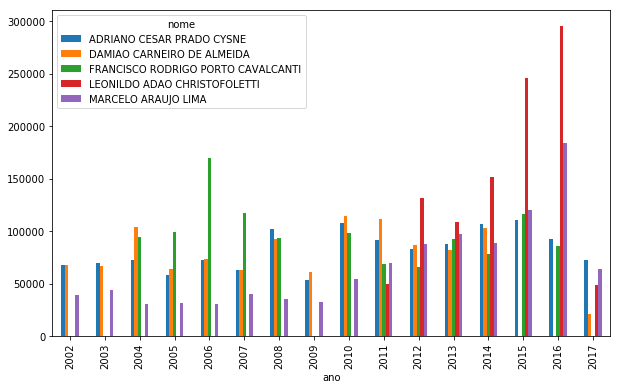

In [131]:
top_5_ = fcpc[fcpc.nome.isin(top_5.index)]

top_5_.groupby([top_5_.ano, "nome"])["valor"].sum().unstack().plot(kind="bar", figsize=(10, 6))

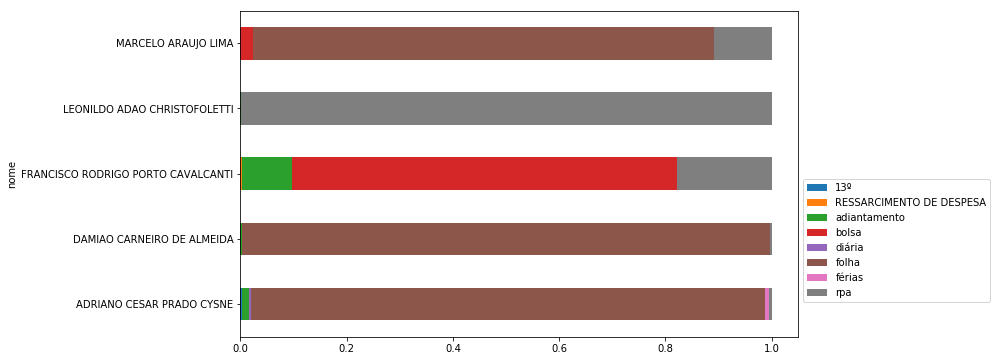

In [132]:
top_5_tdp = top_5_.groupby(["nome", "tipo_consolidado"]).valor.sum().unstack().fillna(0)

top_5_tdp.div(top_5_tdp.sum(axis=1), axis=0).plot(kind="barh", stacked=True, figsize=(10, 6))
plt.legend(bbox_to_anchor=(1., .5))

In [51]:
fcpc[fcpc.PROJETO_ == "1089 - RESCISAO CONTRATUAL"].groupby("TIPO DE PAGAMENTO").sum()

,VALOR (R$)
TIPO DE PAGAMENTO,
FOLHA DE PAGAMENTO - CLT,"6.485.842,25"
LIQUIDO DA FOLHA,"2.859.822,82"
RECURSOS HUMANOS,"19.659,97"
RPA,"55.362,47"
SERVIÇO PRESTADO - RPA,"112.322,95"


In [140]:
fcpc.groupby("projeto_").valor.mean().nlargest(5)

projeto_
3134 - TERMO DE COOPERACAO HENRY/UFC/FCPC                                   35.416,67
1378 - CV - FINEP/FCPC-CRIACAO DO C.PESQ. DA UFC                            31.685,33
2247 - CT -  BIO-RIO/FCPC-PREST.SERVICOS AUMENTO DA CAP.RODOVIA BR-222/CE   30.000,00
2983 - CT - UFC/FCPC - PLANO DE BENEFICIOS DO PODER EXECUT                  21.925,93
3204 - TC - GNATUS/UFC/FCPC                                                 21.844,44
Name: valor, dtype: float64

In [56]:
fcpc[fcpc.PROJETO_ == "3134 - TERMO DE COOPERACAO HENRY/UFC/FCPC"]

,DATA,VALOR (R$),CPF,NOME,TIPO DE PAGAMENTO,PROJETO,PROJETO_ID,PROJETO_
177.438,2015-03-31,"35.416,67",***.438.673-**,CLEITON MACIEL ROCHA DA SILVA,SERVIÇO PRESTADO - RPA,3134 - TERMO DE COOPERACAO HENRY/UFC/FCPC,3134,3134 - TERMO DE COOPERACAO HENRY/UFC/FCPC
